In [1]:
# inporting the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the training set
dataset_train = pd.read_csv("/content/drive/MyDrive/Deep_Learning/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values # .values is used for making it a numpy array

In [3]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [10]:
#Initialising RNN
regressor = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)),#LSTM input_shape is 2D; # Adding first LSTM layer
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
    
])


In [11]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
regressor.fit(X_train, y_train, epochs=250, batch_size=32)

Epoch 1/250
38/38 [==============================] - 1s 15ms/step - loss: 9.1697e-04
Epoch 2/250
38/38 [==============================] - 0s 12ms/step - loss: 9.1064e-04
Epoch 3/250
38/38 [==============================] - 0s 12ms/step - loss: 9.7272e-04
Epoch 4/250
38/38 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 5/250
38/38 [==============================] - 0s 12ms/step - loss: 8.6424e-04
Epoch 6/250
38/38 [==============================] - 0s 13ms/step - loss: 9.2987e-04
Epoch 7/250
38/38 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 8/250
38/38 [==============================] - 0s 12ms/step - loss: 9.3685e-04
Epoch 9/250
38/38 [==============================] - 0s 12ms/step - loss: 9.4260e-04
Epoch 10/250
38/38 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 11/250
38/38 [==============================] - 0s 12ms/step - loss: 8.9231e-04
Epoch 12/250
38/38 [==============================] - 0s 12ms/step - loss: 

#Getting the real stock price of 2017

In [13]:
dataset_test = pd.read_csv("/content/drive/MyDrive/Deep_Learning/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [14]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [15]:
real_stock_price[0:6]

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86]])

In [16]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 : ].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [17]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [22]:
predicted_stock_price

array([[789.5825 ],
       [787.30835],
       [793.7498 ],
       [792.6322 ],
       [798.5477 ],
       [806.9524 ],
       [808.1976 ],
       [806.131  ],
       [807.8634 ],
       [808.5441 ],
       [808.19543],
       [807.33716],
       [806.9815 ],
       [808.3999 ],
       [808.8781 ],
       [819.2417 ],
       [824.70654],
       [830.11505],
       [828.60034],
       [815.49194]], dtype=float32)

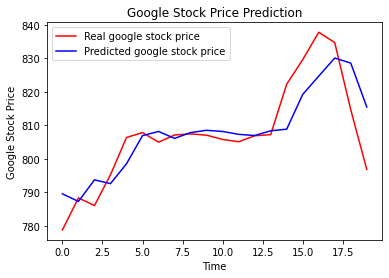

In [21]:
plt.plot(real_stock_price, color = 'red', label="Real google stock price")
plt.plot(predicted_stock_price, color="blue", label="Predicted google stock price")
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()